In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

In [ ]:
!pip install haversine
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1)
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43920083,https://www.airbnb.com/rooms/43920083,20210411033700,2021-04-15,Hostellar - Stunning Flat in Central London,Perfectly located between Waterloo Station and...,The flat is perfectly located beside Lambeth N...,https://a0.muscache.com/pictures/miso/Hosting-...,269308503,https://www.airbnb.com/users/show/269308503,...,10.0,10.0,10.0,NaN,t,33,33,0,0,0.44
1,15262253,https://www.airbnb.com/rooms/15262253,20210411033700,2021-04-17,"Single Room, 1R Duchy House, Central London",A front facing single bedroom room with separa...,There are a number of coffee shop outlets (Caf...,https://a0.muscache.com/pictures/10bd11a8-3a1b...,79435358,https://www.airbnb.com/users/show/79435358,...,10.0,10.0,8.0,NaN,t,35,0,34,0,0.33
2,392246,https://www.airbnb.com/rooms/392246,20210411033700,2021-04-16,Private bathroom Free parking West Thamesmead,Nice and modern bedroom located on the ground ...,The house is located on a square in a resident...,https://a0.muscache.com/pictures/17010cbe-7fc6...,1961516,https://www.airbnb.com/users/show/1961516,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.16
3,30054179,https://www.airbnb.com/rooms/30054179,20210411033700,2021-04-18,Marvelous view over the city of London,<b>The space</b><br />The property is new Geor...,"Outside it's very green , leafy and calm. You ...",https://a0.muscache.com/pictures/1a0d3619-72f7...,18846179,https://www.airbnb.com/users/show/18846179,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN
4,29098736,https://www.airbnb.com/rooms/29098736,20210411033700,2021-04-16,"A Spacious, light, airy room in Battersea","Two minutes from beautiful Battersea Park, thi...",Battersea is a vibrant and leafy part of South...,https://a0.muscache.com/pictures/1eebfa23-2c2f...,36868988,https://www.airbnb.com/users/show/36868988,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.35


In [ ]:
y=df_listings[df_listings['id']==14300858]
y

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amen_as_list,amenities_list
10749,14300858,https://www.airbnb.com/rooms/14300858,20210411033700,2021-04-14,Picturesque Notting Hill Studio,We are still accepting bookings and taking ext...,The apartment is perfectly sandwiched between ...,https://a0.muscache.com/pictures/3a257357-cb63...,82436841,https://www.airbnb.com/users/show/82436841,...,9.0,0.0,f,21,21,0,0,5.07,"[Kitchen, Bed linens, Hangers, Smart lock, Fir...","""[\""Kitchen\"", \""Bed linens\"", \""Hangers\"", \""..."


In [ ]:
df_listings.shape

(30000, 74)

In [ ]:
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [ ]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [ ]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Board games': 53,
 'Kitchen': 27029,
 'Baby bath': 282,
 'Dishwasher': 7000,
 'Bed linens': 10568,
 'Dining table': 471,
 'Hangers': 23232,
 'Private entrance': 7194,
 'Fire extinguisher': 9665,
 'Bathtub': 2972,
 'Long term stays allowed': 24727,
 'Wine glasses': 436,
 'Wifi': 28564,
 'Carbon monoxide alarm': 17390,
 'Heating': 27857,
 'Essentials': 27355,
 'Washer': 25071,
 'Microwave': 10419,
 'Hair dryer': 19899,
 'Freezer': 1103,
 'Dedicated workspace': 18146,
 'Hot water kettle': 706,
 'Refrigerator': 12387,
 'Iron': 22226,
 'Conditioner': 647,
 'Extra pillows and blankets': 5203,
 'Cooking basics': 11334,
 'Mini fridge': 239,
 'Cleaning before checkout': 862,
 'Oven': 10933,
 'Shampoo': 19150,
 'Hot water': 16991,
 'Lockbox': 3482,
 'Dishes and silverware': 12207,
 'Stove': 9850,
 'Crib': 1248,
 'Shower gel': 2496,
 'TV': 17471,
 'Cleaning products': 484,
 'Luggage dropoff allowed': 4374,
 'Cable TV': 4409,
 'Children’s books and toys for ages 0-2 years old, 2-5 years old, 5-1

In [ ]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [ ]:
new_amen[-25:]


[('First aid kit', 9446),
 ('Fire extinguisher', 9665),
 ('Stove', 9850),
 ('Microwave', 10419),
 ('Bed linens', 10568),
 ('Oven', 10933),
 ('Cooking basics', 11334),
 ('Dishes and silverware', 12207),
 ('Refrigerator', 12387),
 ('Dryer', 12922),
 ('Hot water', 16991),
 ('Carbon monoxide alarm', 17390),
 ('TV', 17471),
 ('Dedicated workspace', 18146),
 ('Shampoo', 19150),
 ('Hair dryer', 19899),
 ('Iron', 22226),
 ('Hangers', 23232),
 ('Long term stays allowed', 24727),
 ('Washer', 25071),
 ('Smoke alarm', 25447),
 ('Kitchen', 27029),
 ('Essentials', 27355),
 ('Heating', 27857),
 ('Wifi', 28564)]

In [ ]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Luggage dropoff allowed',
 'Cable TV',
 'Host greets you',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Free parking on premises',
 'Elevator',
 'Coffee maker',
 'Dishwasher',
 'Private entrance']

In [ ]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
0,100.0
1,91.0
2,99.0
3,0.0
4,100.0
...,...
29995,80.0
29996,98.0
29997,89.0
29998,94.0


In [ ]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,0,0,0,0,0,0,0,0,0,0
1,91.0,0,0,0,0,0,0,0,0,0,0
2,99.0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0
4,100.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,0
29996,98.0,0,0,0,0,0,0,0,0,0,0
29997,89.0,0,0,0,0,0,0,0,0,0,0
29998,94.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,1,1,0,0,1,0,0,0,1,1
1,91.0,1,0,1,1,0,0,1,0,0,0
2,99.0,1,0,0,0,1,1,0,0,1,0
3,0.0,0,0,0,1,0,1,0,0,0,0
4,100.0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,1
29996,98.0,0,0,0,0,0,1,1,0,0,0
29997,89.0,0,0,0,1,0,0,0,0,0,0
29998,94.0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [ ]:
feature_importance = etf.feature_importances_
feature_importance

array([0.09072339, 0.07573478, 0.14038729, 0.07335107, 0.10907628,
       0.07295151, 0.07247513, 0.19405367, 0.10233448, 0.0689124 ])

In [ ]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

In [ ]:
newDict[4] = 'Long term stays'

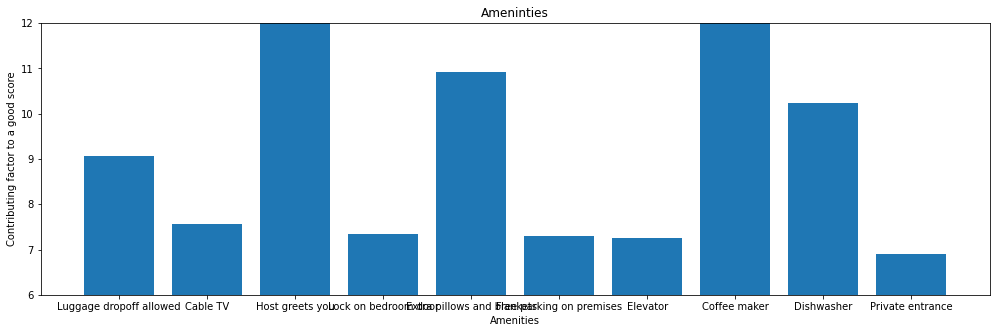

In [ ]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()

In [ ]:
#remove the NAN values 
df1.dropna(how='any',inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            0 non-null      int64  
 1   listing_url                                   0 non-null      object 
 2   scrape_id                                     0 non-null      int64  
 3   last_scraped                                  0 non-null      object 
 4   name                                          0 non-null      object 
 5   description                                   0 non-null      object 
 6   neighborhood_overview                         0 non-null      object 
 7   picture_url                                   0 non-null      object 
 8   host_id                                       0 non-null      int64  
 9   host_url                                      0 non-null      object 
 10  ho

In [ ]:
df_listings.neighbourhood_cleansed.unique().shape

(33,)

In [ ]:
from tkinter.constants import Y
from haversine import haversine
locl=y.loc[:,['latitude','longitude']].values[0].tolist()
print(type(locl))
print(locl)
def cal_distance(la,lon):
  loc2=[la,lon]
  return haversine(locl,loc2)
df_listings['distance']=df_listings[['latitude','longitude']].apply(
    lambda x:cal_distance(x['latitude'],x['longitude']),axis=1)

IndexingError: ignored

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 建立地圖
london_map = folium.Map(location=[51.51005,-0.19486], zoom_start=10, width="75%", height='75%', position='relative')

# 建立標記和圓圈
loc = [51.51005,-0.19486]
folium.Marker(location=loc, popup='14300858', icon=folium.Icon(color='green')).add_to(london_map)
folium.Circle(radius=3000, location=loc, color='blue', fill=False).add_to(london_map)

# 建立標記群組
df_loc = df_listings.loc[:, ['latitude','longitude']].values.tolist()
marker_cluster = MarkerCluster().add_to(london_map)
for loc in df_loc:
    folium.Marker(location=loc, icon=None).add_to(marker_cluster)

# 顯示地圖
london_map


In [ ]:
df_listings=df_listings[(df_listings['distance']<=3)]

KeyError: ignored

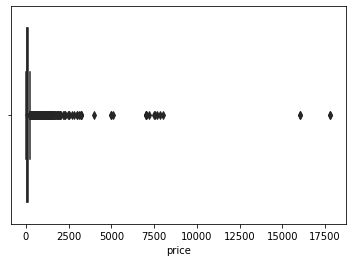

In [ ]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

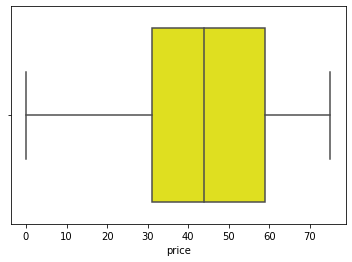

In [ ]:
# 從 df_listings 中篩選出價格小於等於 101 的資料
df_listings_boxplot = df_listings[df_listings['price'] <= 75]

# 使用 seaborn 套件的 boxplot 函數畫出箱形圖
boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [ ]:
df_listings.price.quantile([0.25,0.5,0.75,1])

0.25       43.0
0.50       75.0
0.75      125.0
1.00    17806.0
Name: price, dtype: float64

In [ ]:
df_listings=df_listings[df_listings['price'].between(43,75)]
df_listings.shape[0]

7819

In [ ]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
6,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...","""[\""Essentials\"", \""Kitchen\"", \""Washer\"", \""E..."
7,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
8,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."
22,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."


In [ ]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()


,amenities,amenities_list
39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...","[Dishwasher, Kitchen, Bed linens, Hangers, Pri..."
42,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Long ter...","[Kitchen, Bed linens, Hangers, Long term stays..."
98,"[""Essentials"", ""Kitchen"", ""Washer"", ""Shampoo"",...","[Essentials, Kitchen, Washer, Shampoo, Breakfa..."
105,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...","[Dishwasher, Kitchen, Bed linens, Hangers, Lon..."
187,"[""Dishwasher"", ""Essentials"", ""Kitchen"", ""Washe...","[Dishwasher, Essentials, Kitchen, Washer, Bed ..."


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

,GNLD conditioner,"24"" HDTV with Netflix, Amazon Prime Video","24"" TV with standard cable","28"" HDTV","32"" HDTV with Netflix","32"" HDTV with Netflix, standard cable","32"" TV with Netflix","32"" TV with standard cable","34"" HDTV with Netflix","38"" TV with Amazon Prime Video, Netflix",...,Wifi – 89 Mbps,Window AC unit,Window guards,Wine glasses,bosh refrigerator,built in refrigerator,electric hob stainless steel induction stove,marshall sound system with Bluetooth and aux,neff oven,standard fridge with small freezer shelf refrigerator
id,,,,,,,,,,,,,,,,,,,,,
15262253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4815852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47933756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37015208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26363550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


,counts,availability_cluster
Refrigerator,2913,3
Dryer,2850,3
Dishes and silverware,2843,3
Cooking basics,2646,3
Bed linens,2511,3
Oven,2406,3
First aid kit,2386,3
Microwave,2318,3
Fire extinguisher,2290,3
Stove,2258,3


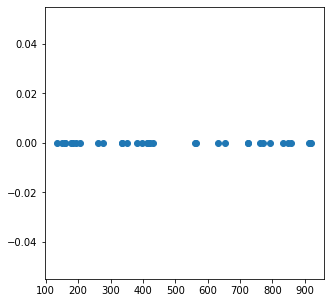

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]))
plt.show()


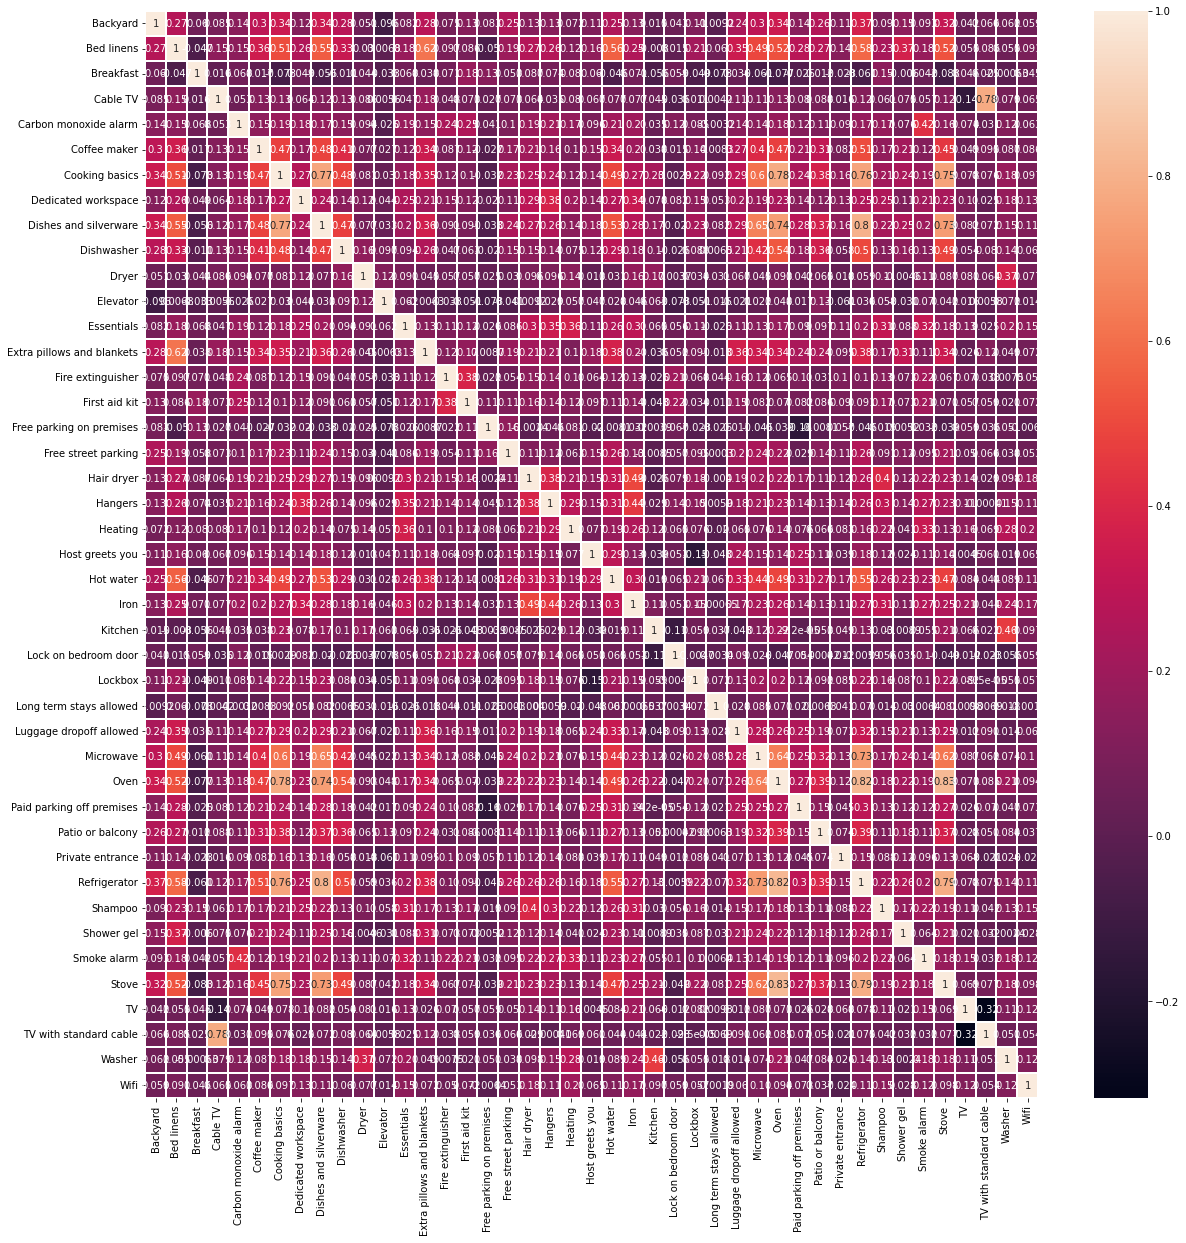

In [ ]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [ ]:
xx=x_final.copy()
xx['lessential_amen']=xx['Wifi']+xx['Heating']+xx['Essentials']+xx['Kitchen']+xx['Smoke alarm']+xx['Washer']+xx['Long term stays allowed']+xx['Hangers']
xx['2common_amen']=xx['Iron']+xx['Shampoo']+xx['Hair dryer']+xx['Dedicated workspace']+xx['Carbon monoxide alarm']+xx['TV']
xx['3upgraded_amen']=xx['Refrigerator']+xx['Dishes and silverware']+xx['Cooking basics']+xx['Oven']+xx['Microwave']+xx['Stove']+xx['Dryer']+xx['Dishwasher']+xx['Bed linens']+xx['First aid kit']+xx['Fire extinguisher']
xx['4other_amen']=xx['Private entrance']+xx['Free parking on premises']+xx['Lock on bedroom door']+xx['Elevator']+xx['Coffee maker']+xx['Host greets you']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()






,lessential_amen,2common_amen,3upgraded_amen,4other_amen
id,,,,
15262253,8,5,3,3
4815852,6,0,1,1
47933756,8,6,3,2
37015208,6,3,1,2
26363550,8,4,1,1


        lessential_amen 2common_amen 3upgraded_amen 4other_amen
                   mean         mean           mean        mean
cluster                                                        
0              6.446959     3.146231       1.213344    0.893722
1              7.485756     4.567568       7.466399    1.563550
            id  lessential_amen  2common_amen  3upgraded_amen  4other_amen  \
2853  14300858                8             4               7            0   

      cluster  
2853        1  


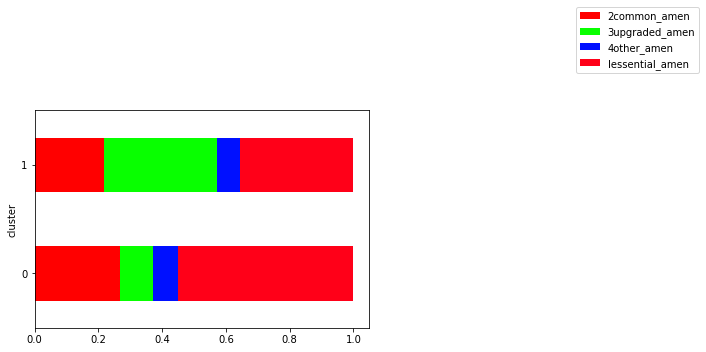

In [ ]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/bnb_reviews.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [ ]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/bnb_reviews.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [ ]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [ ]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

     listing_id  sentiment_score
975    14300858         0.637159
0.7193125081316772
0.998
-0.9646
0.2982383296881828


<function matplotlib.pyplot.show(*args, **kw)>

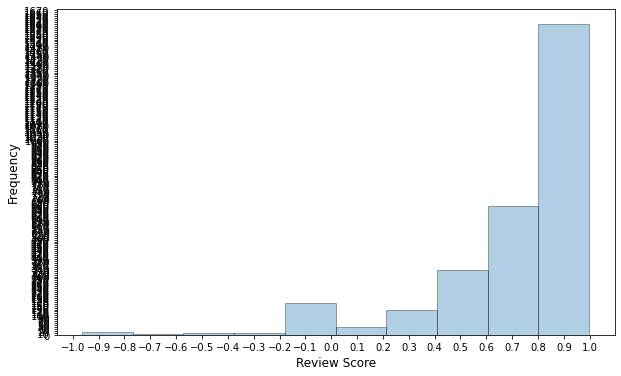

In [ ]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [ ]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

,id,lessential_amen,2common_amen,3upgraded_amen,4other_amen,cluster,listing_id,sentiment_score
0,15262253,8,5,3,3,0,15262253,0.947300
1,16093486,7,3,0,1,0,16093486,0.817409
2,23987680,8,5,8,2,1,23987680,0.982700
3,12977058,8,6,6,2,1,12977058,0.722700
4,22463730,7,4,3,1,0,22463730,0.890200
...,...,...,...,...,...,...,...,...
2952,32584565,7,4,0,1,0,32584565,0.964100
2953,25567661,8,6,6,3,1,25567661,0.768100
2954,143568,8,5,8,2,1,143568,0.466400
2955,28395632,7,5,7,1,1,28395632,0.813967


In [ ]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

,cluster,mean
0,0,0.710678
1,1,0.727140


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.909
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.106
Time:                        03:19:08   Log-Likelihood:                -613.92
No. Observations:                2957   AIC:                             1238.
Df Residuals:                    2952   BIC:                             1268.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
lessential_amen    -0.0443      0.045     

In [ ]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

array([0.72887831])

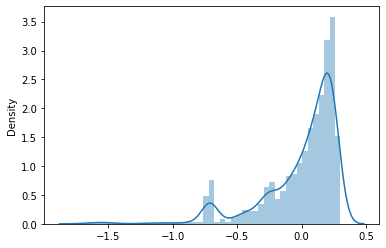

In [ ]:
sns.distplot(model.resid)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

         coef_name     vif
0  lessential_amen   1.351
1     2common_amen   1.373
2   3upgraded_amen   1.266
3      4other_amen   1.150
4            const  40.557


In [ ]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
City of London,67.863636
Westminster,60.460150
Kensington and Chelsea,60.225000
Hackney,59.189062
Southwark,59.075724
Lewisham,58.885593
Hammersmith and Fulham,58.671271
Brent,58.584192
Lambeth,58.568627


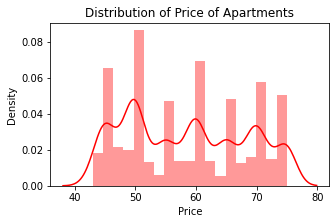

In [ ]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

In [ ]:
from scipy.stats import normaltest

sentiment_scores = df2['sentiment_score']
_, p_value = normaltest(sentiment_scores)

print("p-value: ", p_value)


p-value:  4.533186429195206e-260
